In [ ]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ml/archive (7).zip')

In [ ]:
def dataset_summary(dataset):
    # Display data types
    print("Data Types:")
    print(dataset.dtypes)
    print("\n")

    # Display head
    print("Head:")
    print(dataset.head())
    print("\n")

    # Display tail
    print("Tail:")
    print(dataset.tail())
    print("\n")

    # Display info
    print("Info:")
    print(dataset.info())
    print("\n")

    # Describe
    print("Describe:")
    print(dataset.describe())
    print("\n")

    # Check for null values
    print("Null Values:")
    print(dataset.isnull().sum())
    print("\n")

    # Check for duplicated rows
    print("Duplicated Rows:")
    print(dataset.duplicated().sum())
    print("\n")




In [ ]:
dataset_summary(train)


Data Types:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


Head:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  200

In [ ]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")

Column 'Date' has 3436 unique values.
Column 'Location' has 49 unique values.
Column 'MinTemp' has 390 unique values.
Column 'MaxTemp' has 506 unique values.
Column 'Rainfall' has 682 unique values.
Column 'Evaporation' has 359 unique values.
Column 'Sunshine' has 146 unique values.
Column 'WindGustDir' has 17 unique values.
Column 'WindGustSpeed' has 68 unique values.
Column 'WindDir9am' has 17 unique values.
Column 'WindDir3pm' has 17 unique values.
Column 'WindSpeed9am' has 44 unique values.
Column 'WindSpeed3pm' has 45 unique values.
Column 'Humidity9am' has 102 unique values.
Column 'Humidity3pm' has 102 unique values.
Column 'Pressure9am' has 547 unique values.
Column 'Pressure3pm' has 550 unique values.
Column 'Cloud9am' has 11 unique values.
Column 'Cloud3pm' has 11 unique values.
Column 'Temp9am' has 442 unique values.
Column 'Temp3pm' has 503 unique values.
Column 'RainToday' has 3 unique values.
Column 'RainTomorrow' has 3 unique values.


In [ ]:
train.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

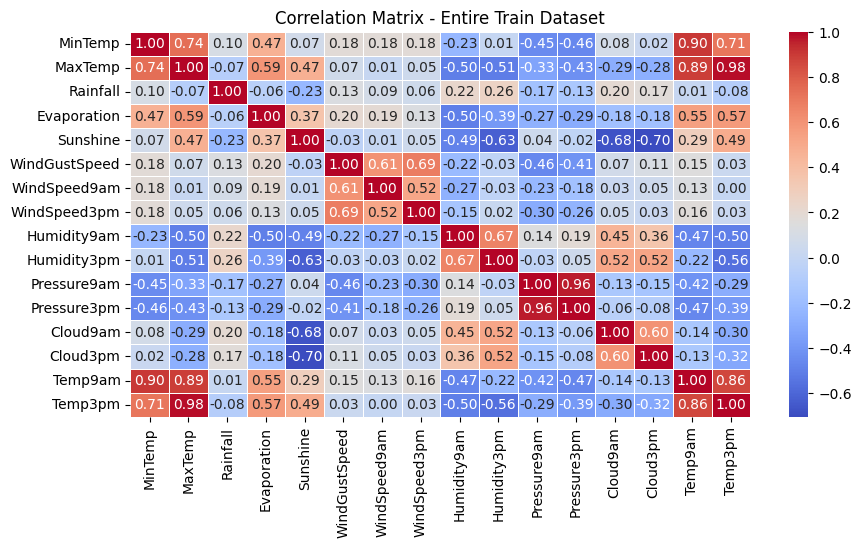

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()

In [ ]:
train = train.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "Location", "Date"], axis=1)
train.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
train = train.dropna(axis=0)
print(train.shape)


(112925, 17)


In [ ]:
train.columns


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['WindGustDir'] = le.fit_transform(train['WindGustDir'])
train['WindDir9am'] = le.fit_transform(train['WindDir9am'])
train['WindDir3pm'] = le.fit_transform(train['WindDir3pm'])
train['RainToday'] = le.fit_transform(train['RainToday'])
train['RainTomorrow'] = le.fit_transform(train['RainTomorrow'])


In [ ]:
X = train.drop(['RainTomorrow'], axis=1)
y = train['RainTomorrow']


In [ ]:
X.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


<Axes: xlabel='WindGustDir', ylabel='count'>

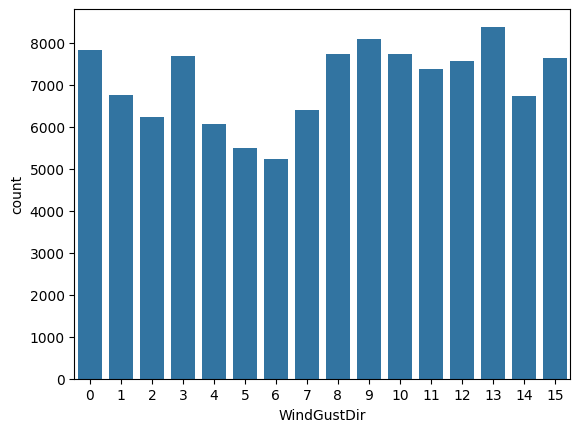

In [ ]:
sns.countplot(x ='WindGustDir', data = train)

<Axes: xlabel='WindDir9am', ylabel='count'>

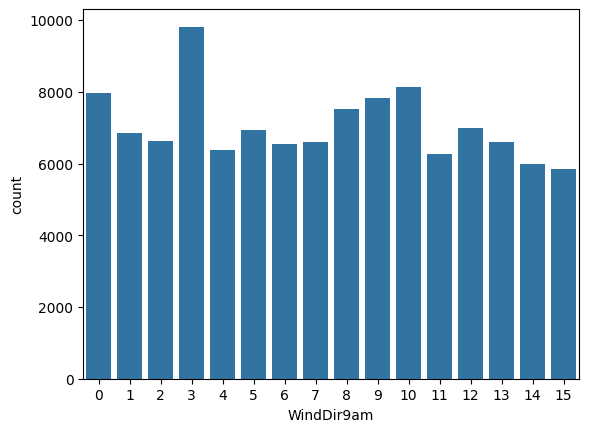

In [ ]:
sns.countplot(x ='WindDir9am', data = train)

<Axes: xlabel='WindDir3pm', ylabel='count'>

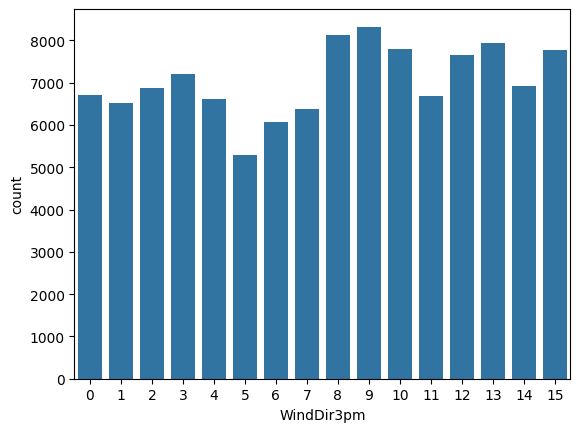

In [ ]:
sns.countplot(x ='WindDir3pm', data = train)

<Axes: xlabel='RainToday', ylabel='count'>

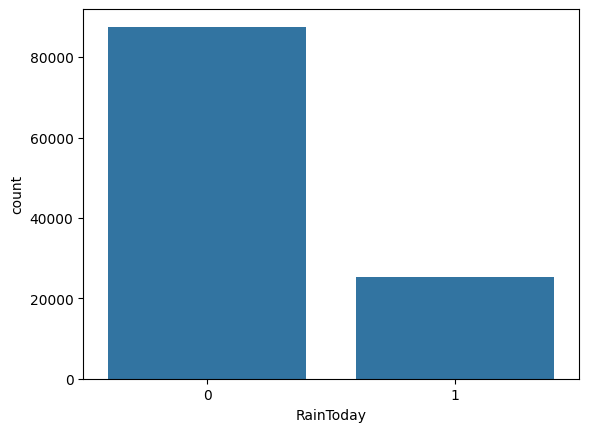

In [ ]:
sns.countplot(x ='RainToday', data = train)

<Axes: xlabel='RainTomorrow', ylabel='count'>

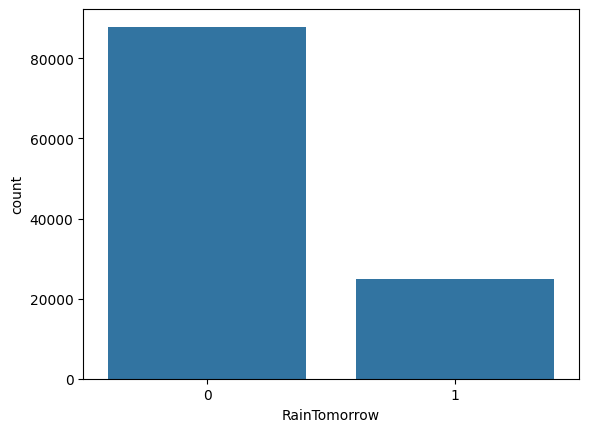

In [ ]:
sns.countplot(x ='RainTomorrow', data = train)

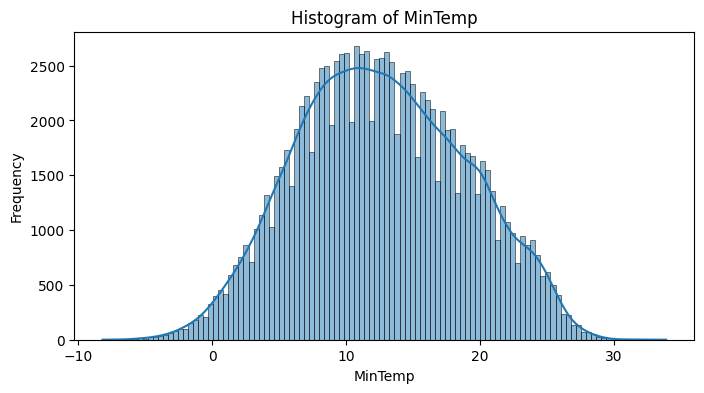

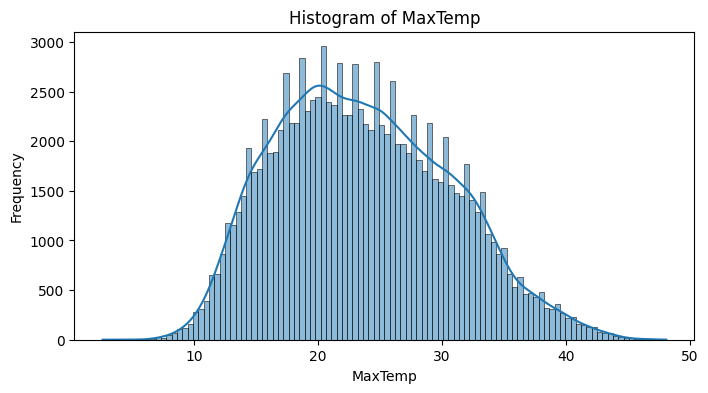

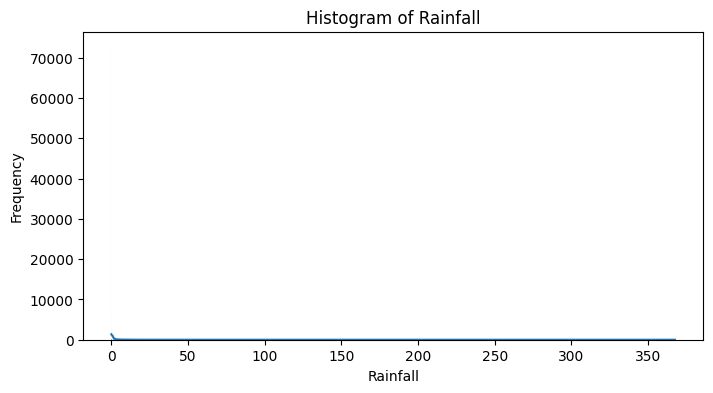

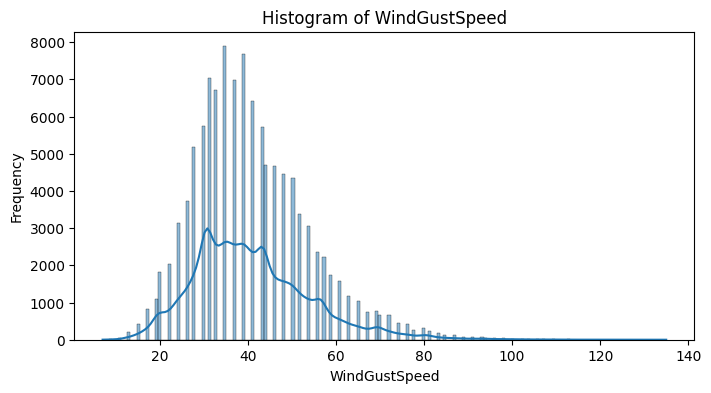

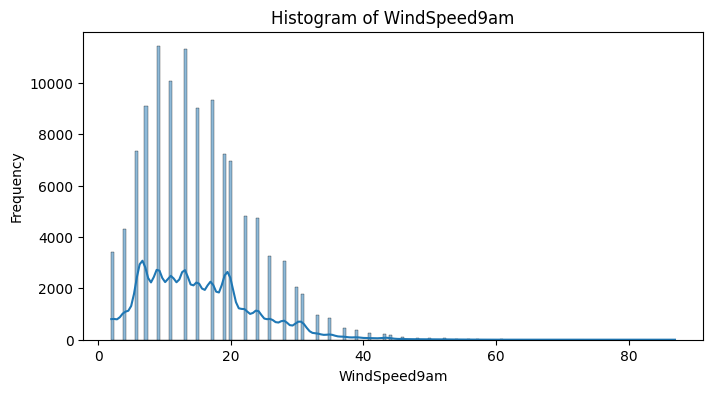

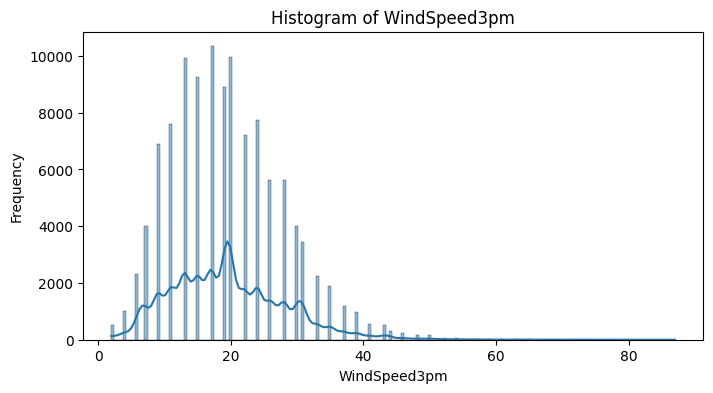

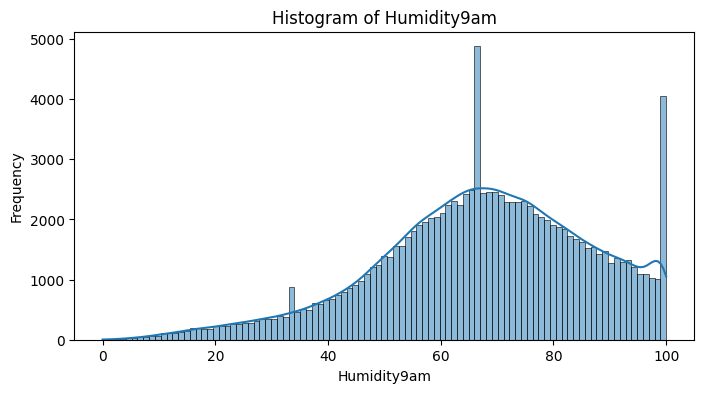

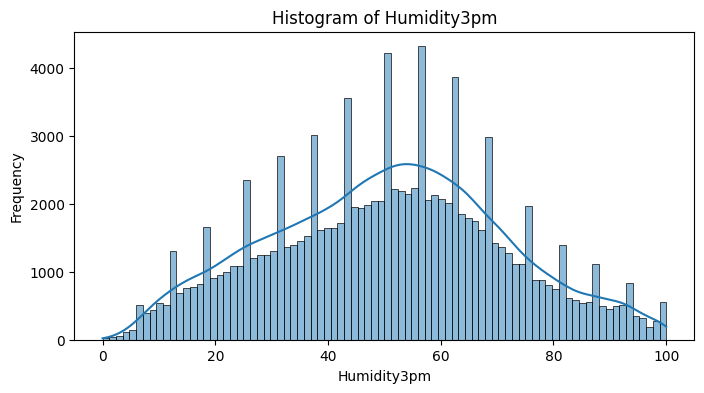

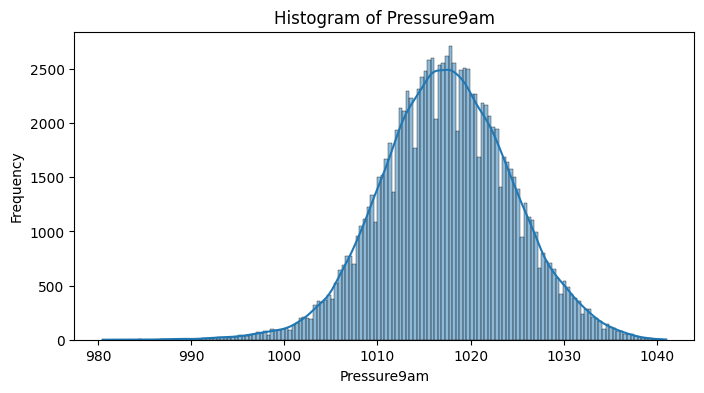

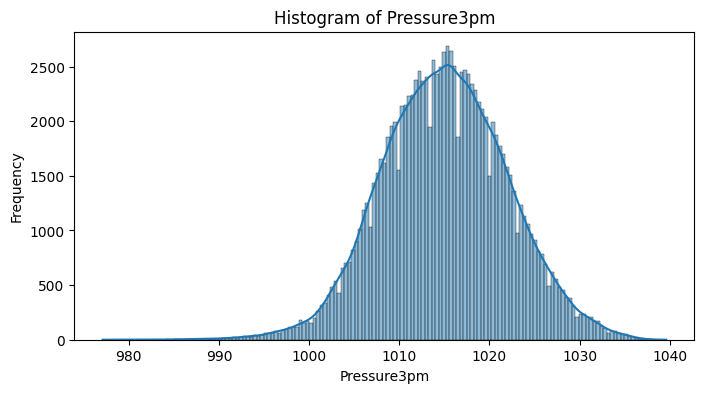

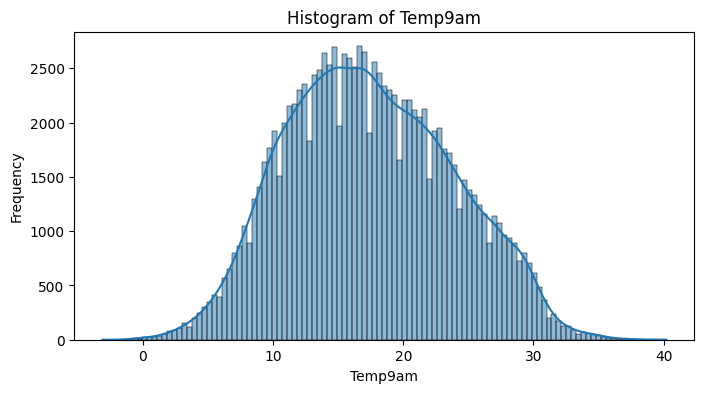

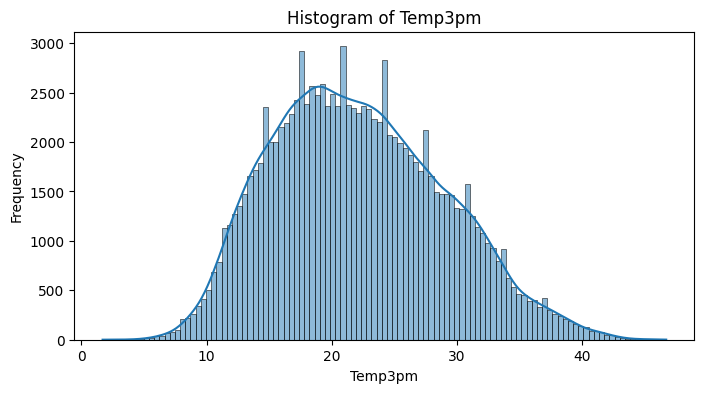

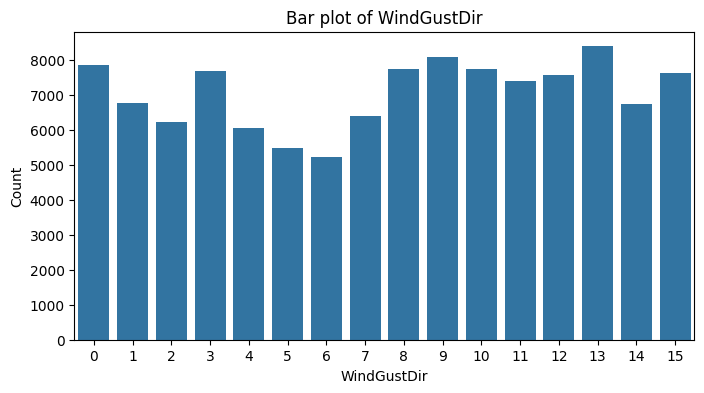

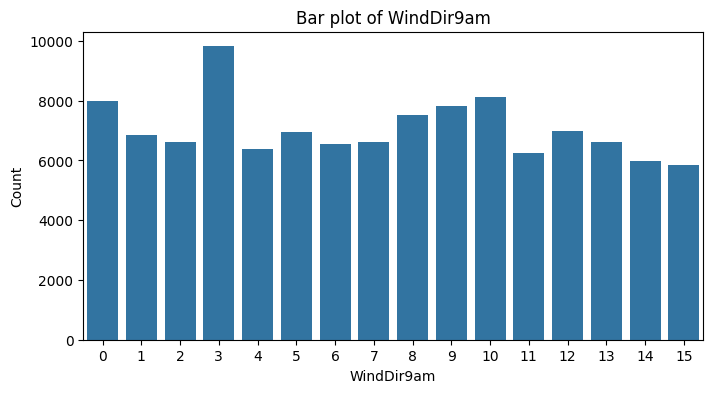

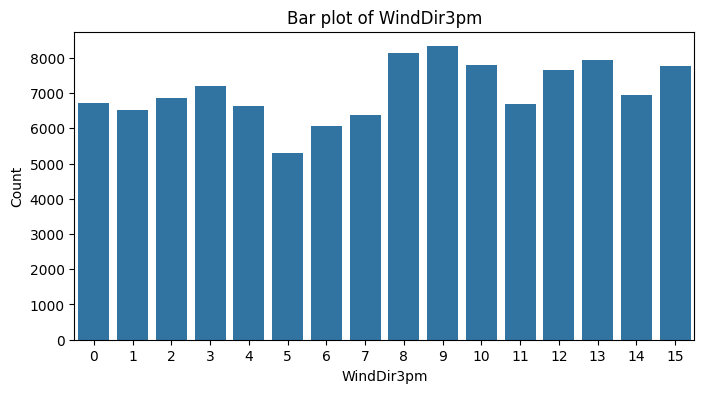

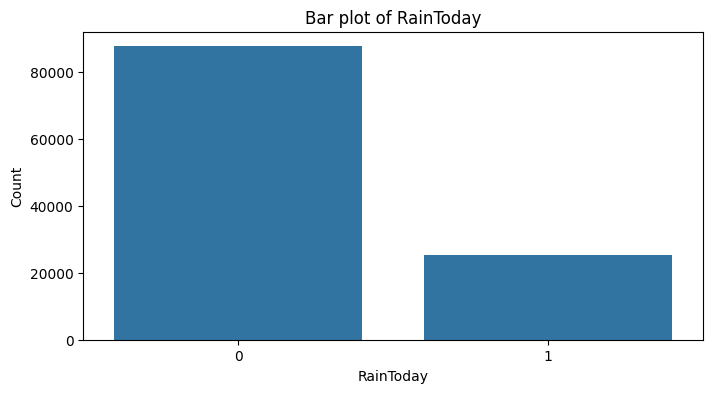

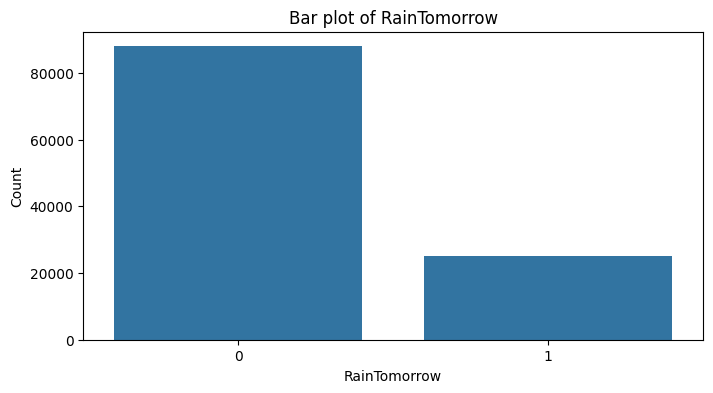

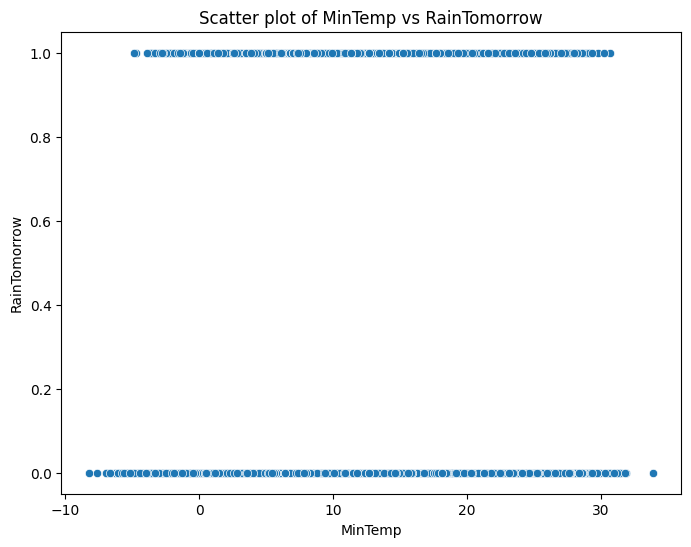

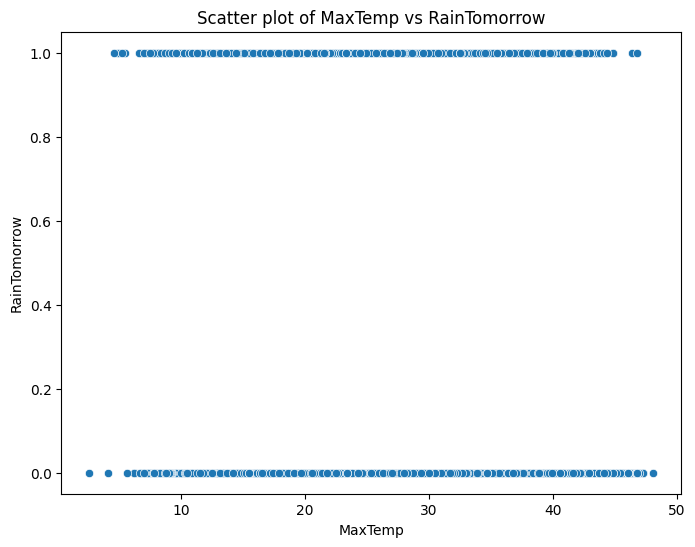

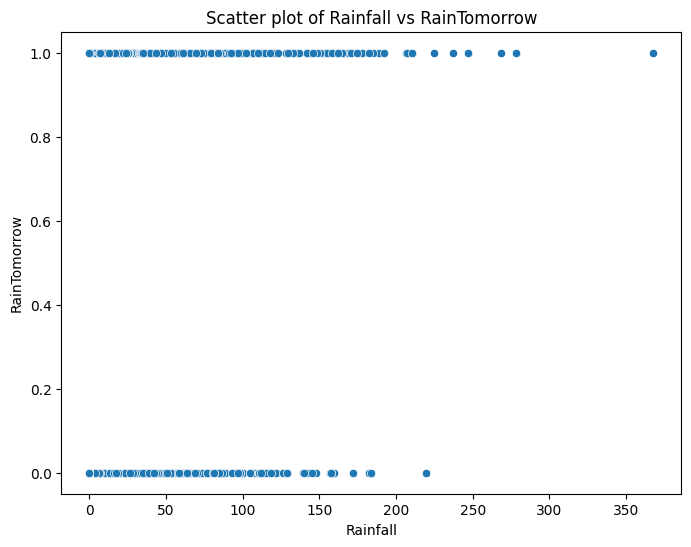

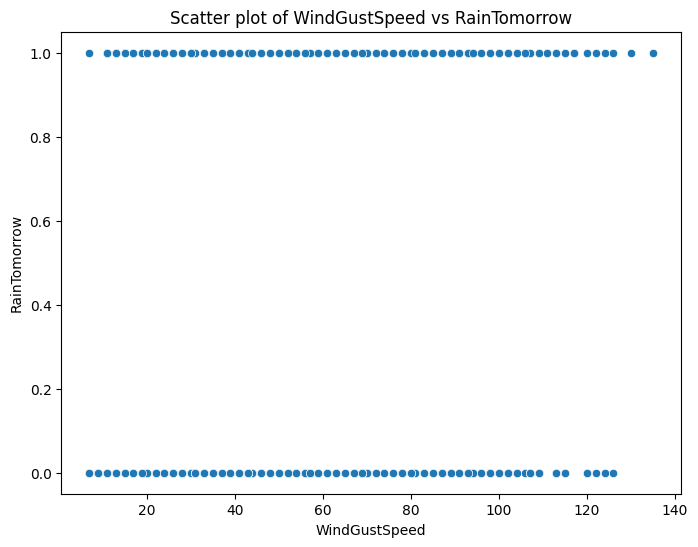

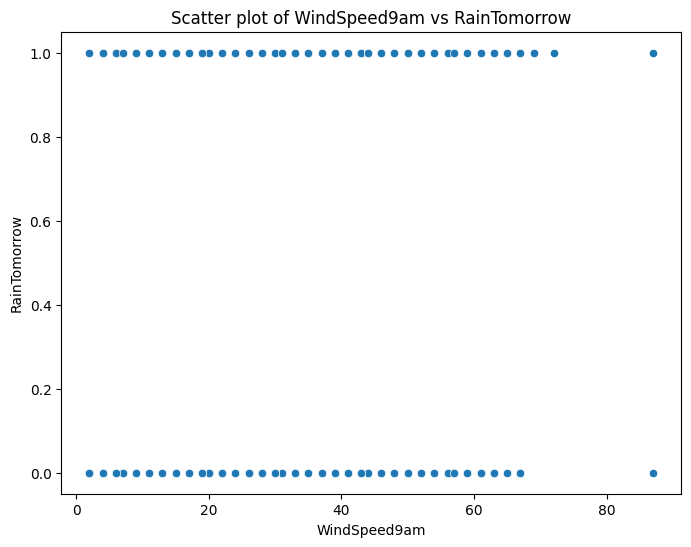

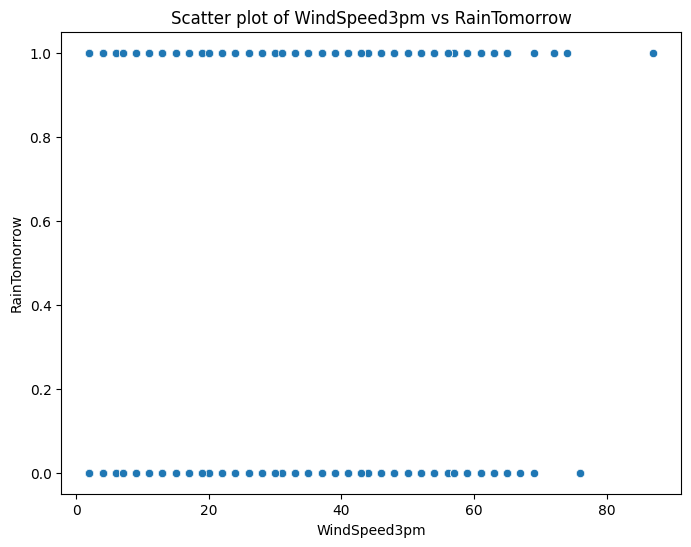

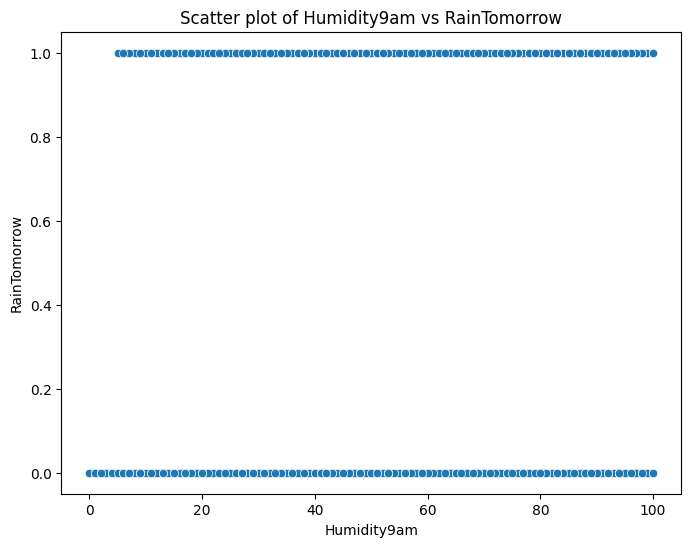

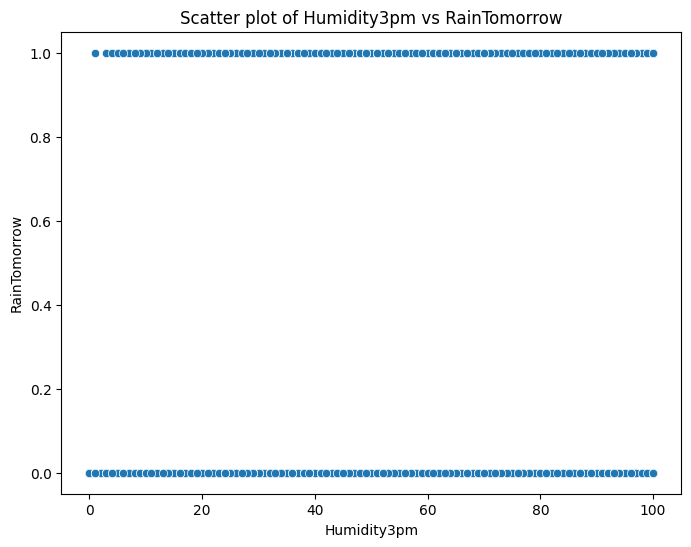

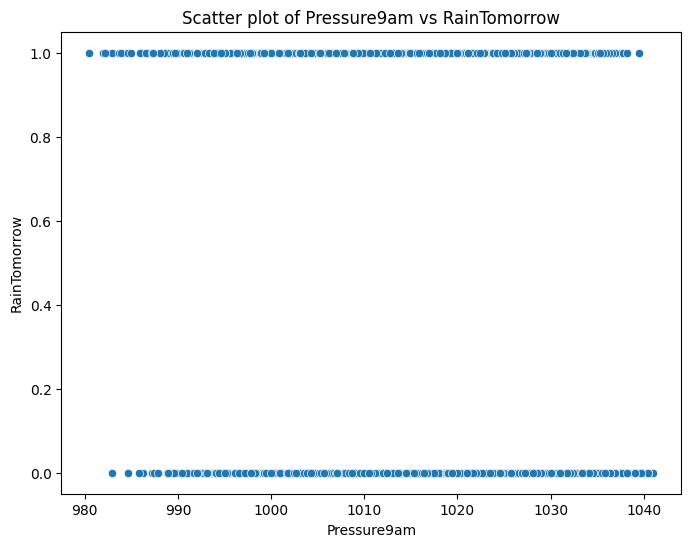

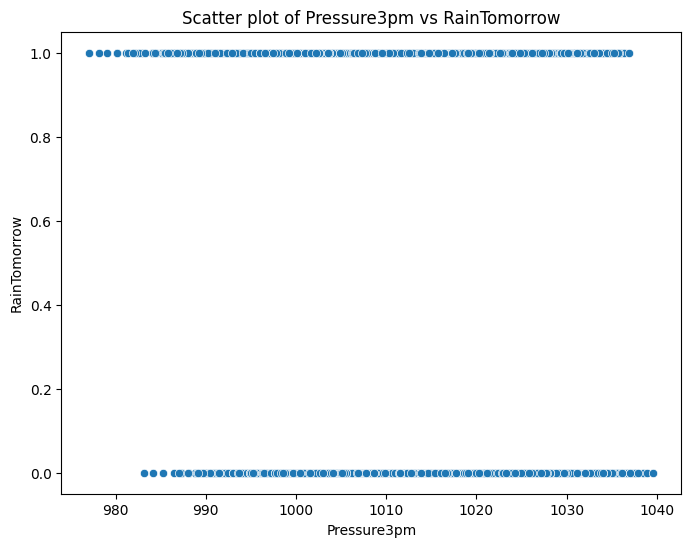

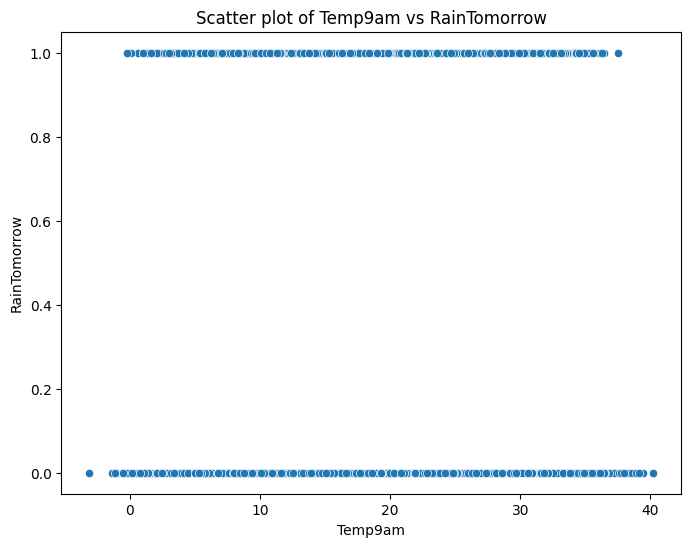

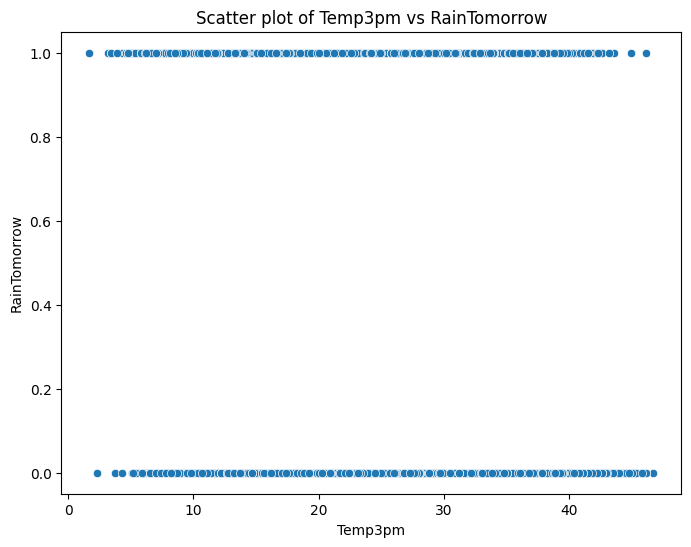

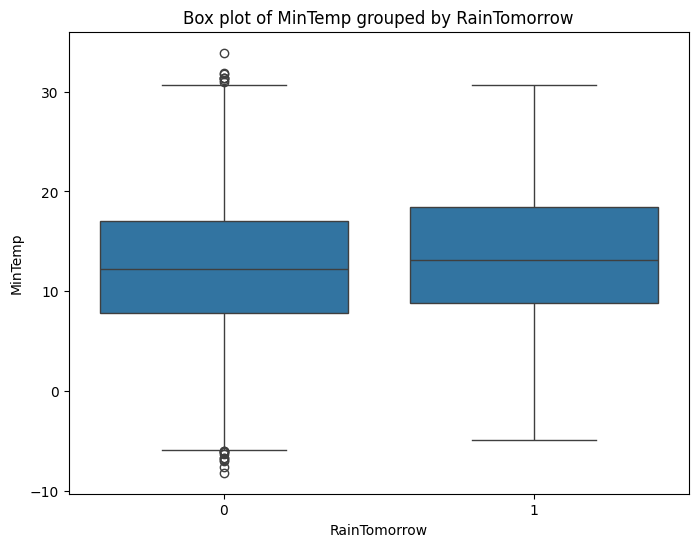

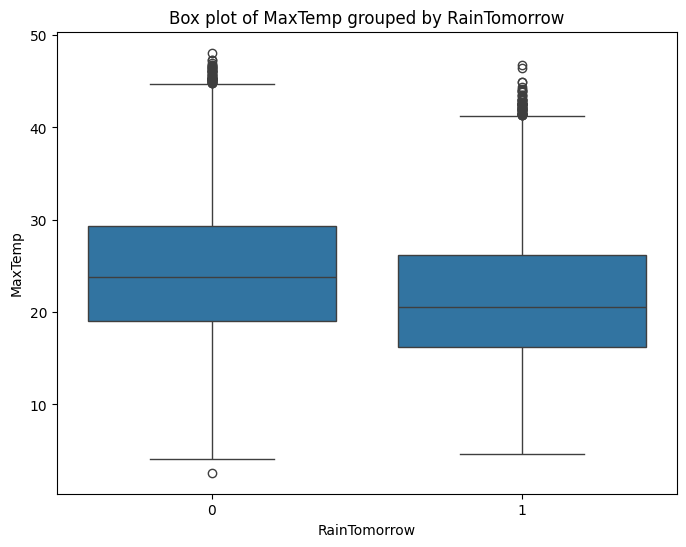

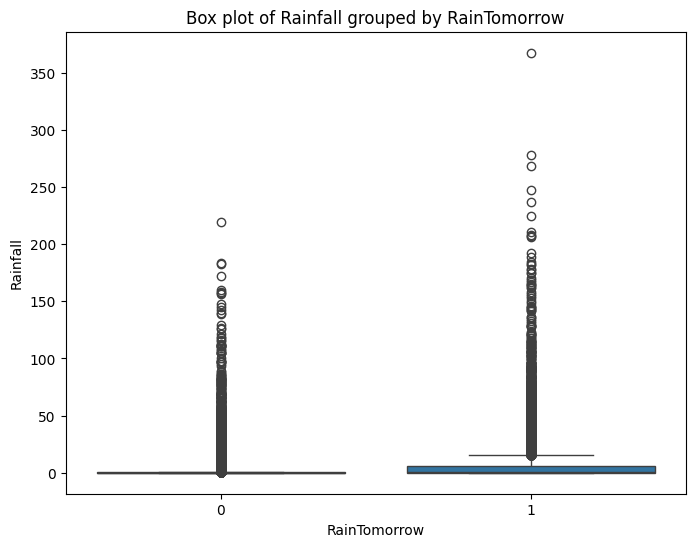

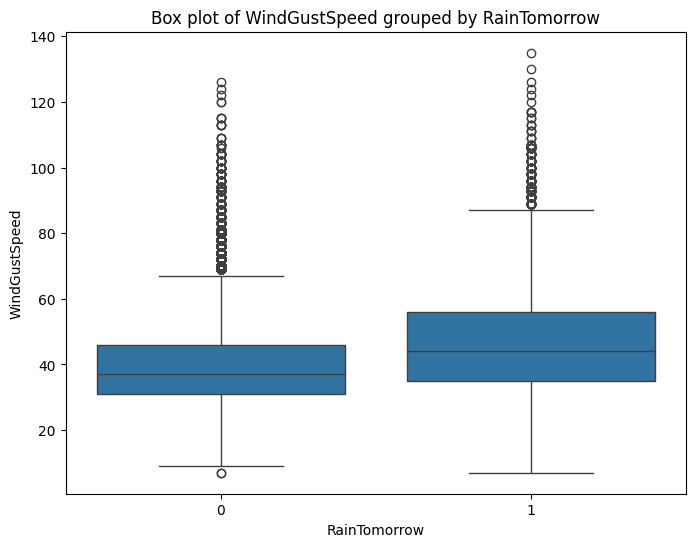

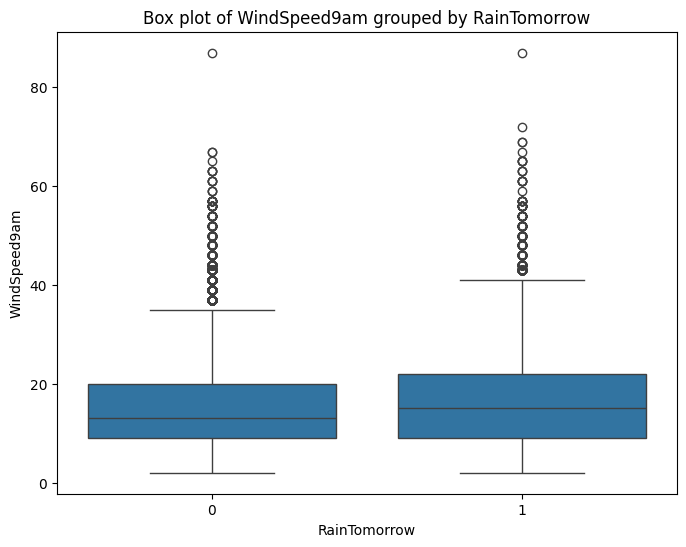

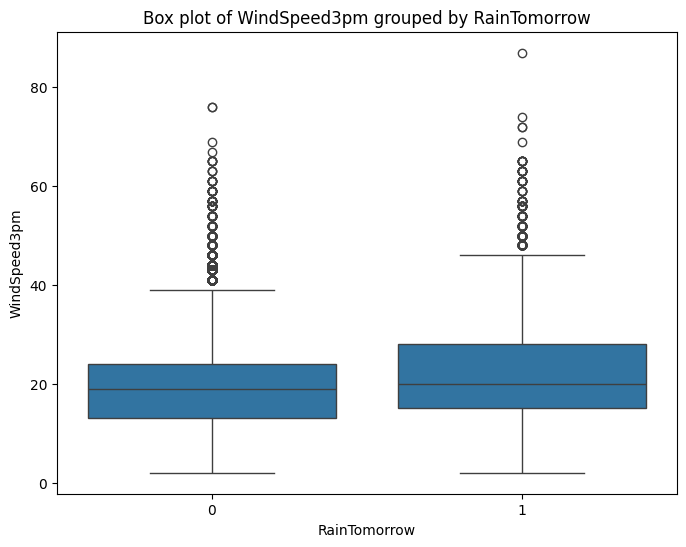

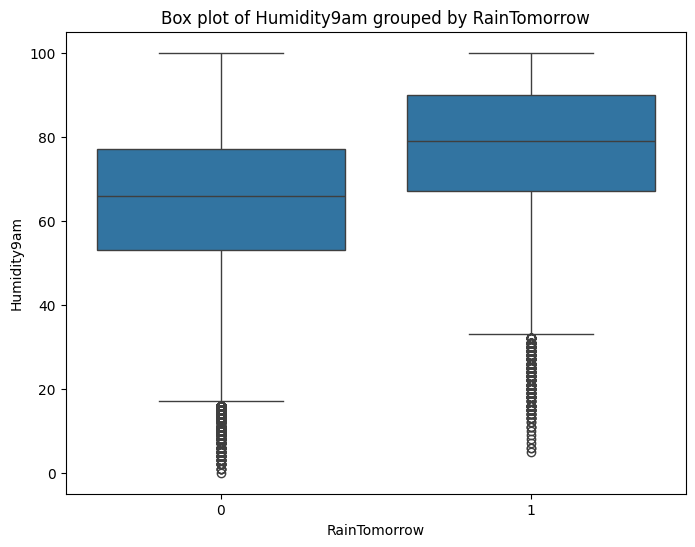

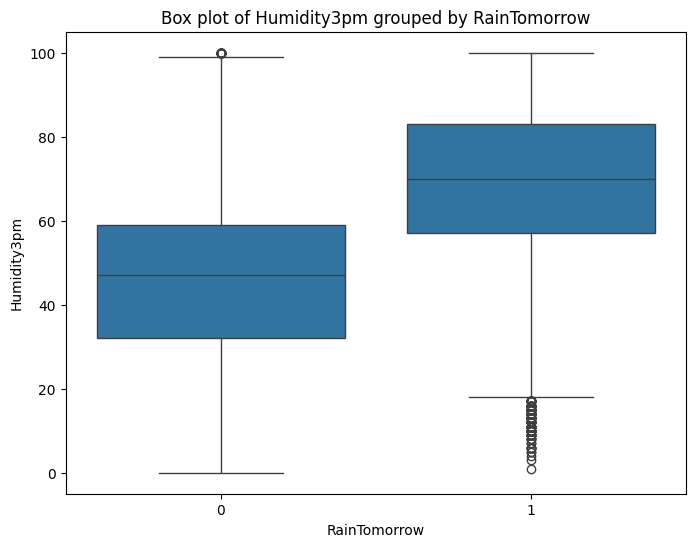

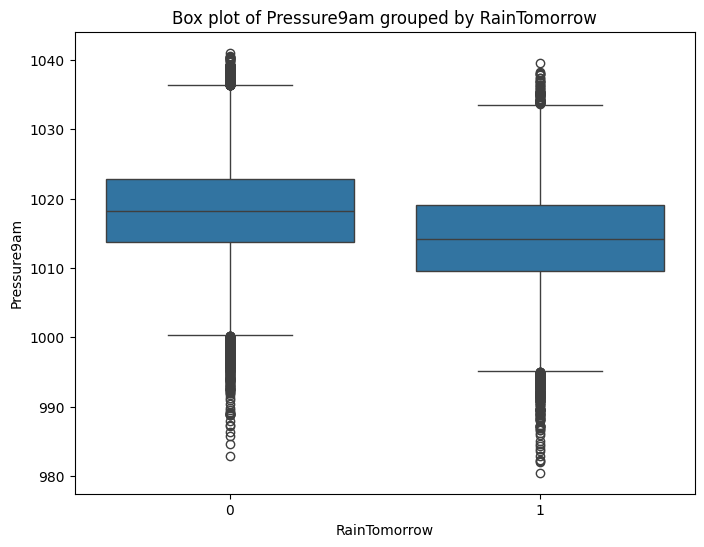

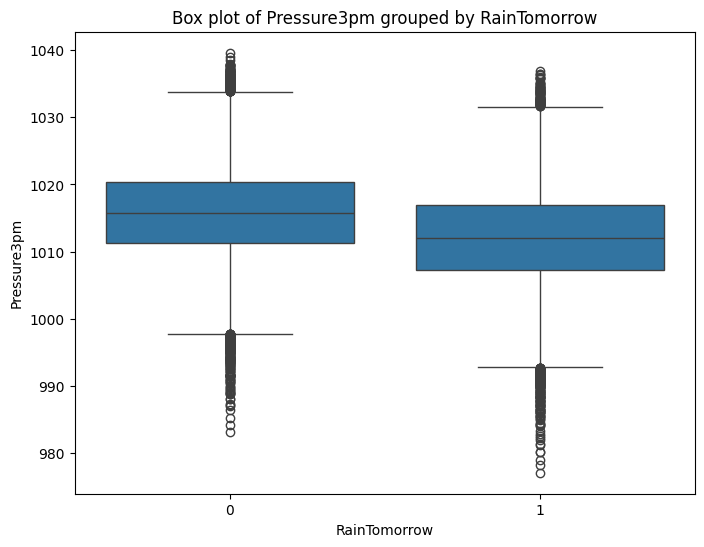

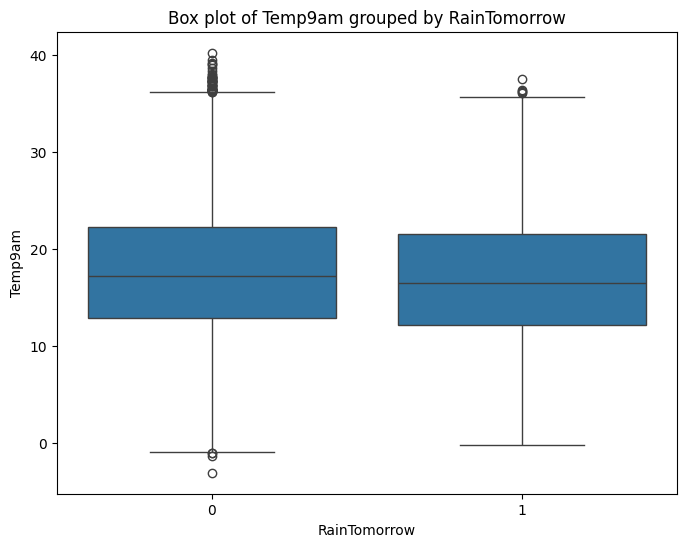

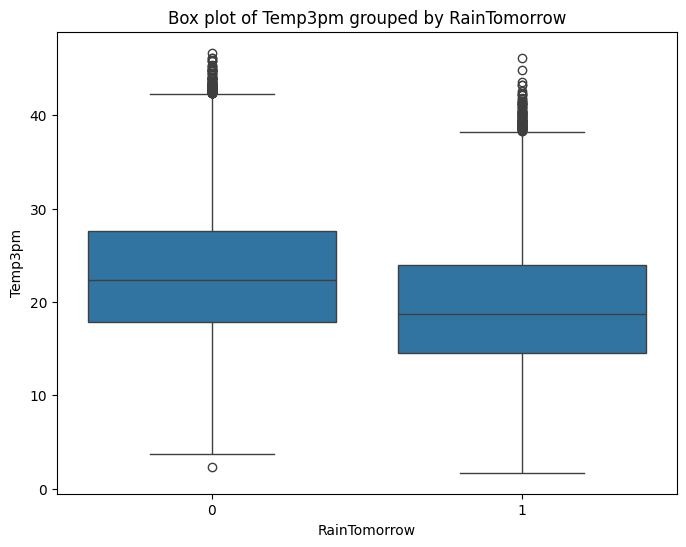

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Plots
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
                      'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                      'Pressure3pm', 'Temp9am', 'Temp3pm']
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=train)
    plt.title(f'Bar plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Bivariate Plots
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='RainTomorrow', data=train)
    plt.title(f'Scatter plot of {feature} vs RainTomorrow')
    plt.xlabel(feature)
    plt.ylabel('RainTomorrow')
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RainTomorrow', y=feature, data=train)
    plt.title(f'Box plot of {feature} grouped by RainTomorrow')
    plt.xlabel('RainTomorrow')
    plt.ylabel(feature)
    plt.show()


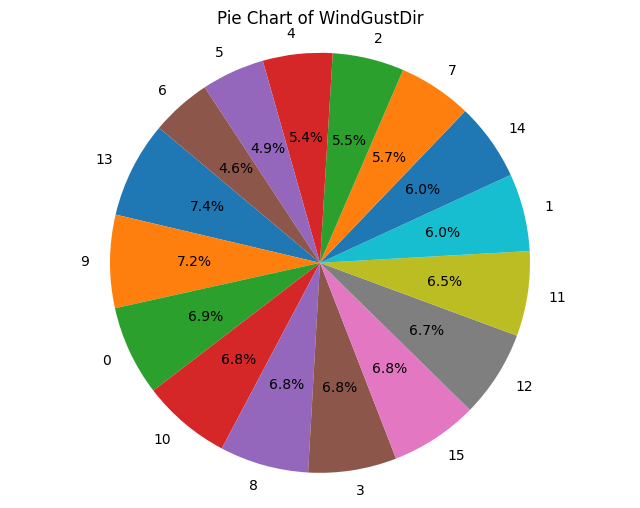

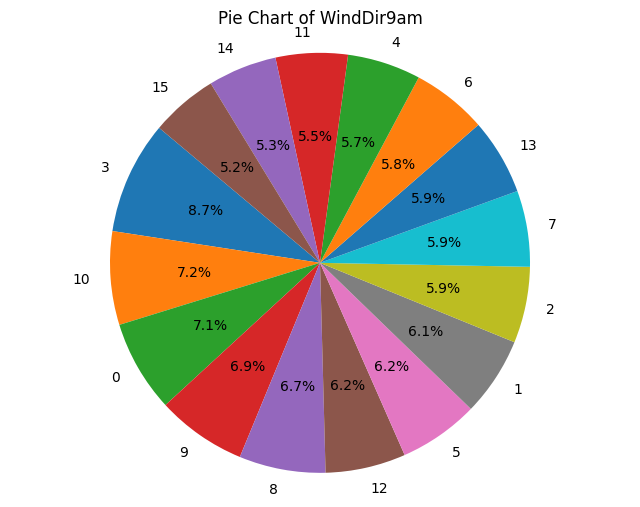

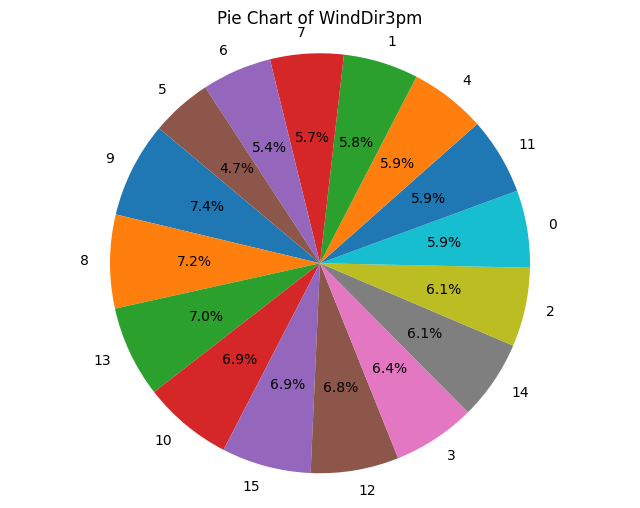

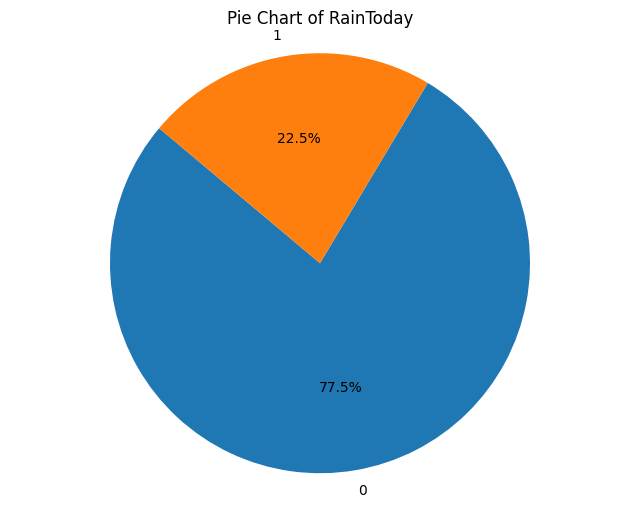

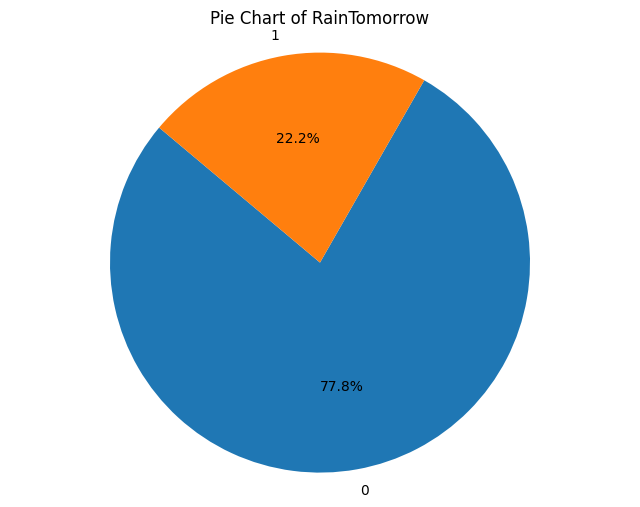

In [ ]:
import matplotlib.pyplot as plt

# Define categorical features for pie charts
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Plot pie charts for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    counts = train[feature].value_counts()
    labels = counts.index
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {feature}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


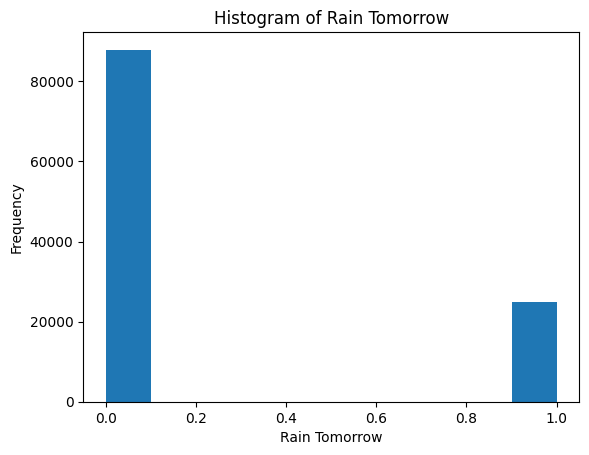

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train['RainTomorrow'])
plt.xlabel('Rain Tomorrow')
plt.ylabel('Frequency')
plt.title('Histogram of Rain Tomorrow')
plt.show()


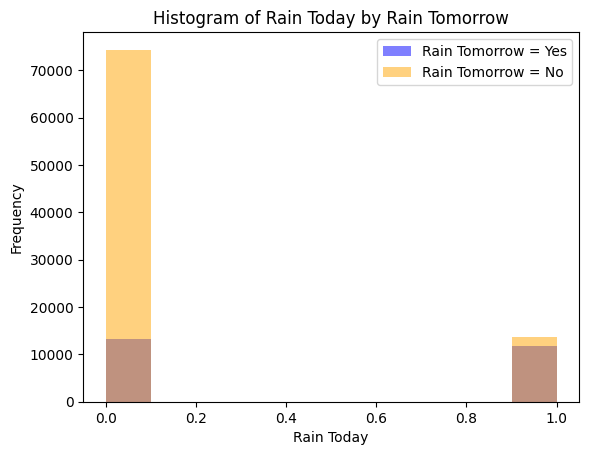

In [ ]:
import matplotlib.pyplot as plt

# Separate data for each category of 'RainTomorrow'
rain_tomorrow_yes = train[train['RainTomorrow'] == 1]['RainToday']
rain_tomorrow_no = train[train['RainTomorrow'] == 0]['RainToday']

# Plot histograms
plt.hist(rain_tomorrow_yes, color='blue', alpha=0.5, label='Rain Tomorrow = Yes')
plt.hist(rain_tomorrow_no, color='orange', alpha=0.5, label='Rain Tomorrow = No')

# Add labels and title
plt.xlabel('Rain Today')
plt.ylabel('Frequency')
plt.title('Histogram of Rain Today by Rain Tomorrow')
plt.legend()

# Show plot
plt.show()


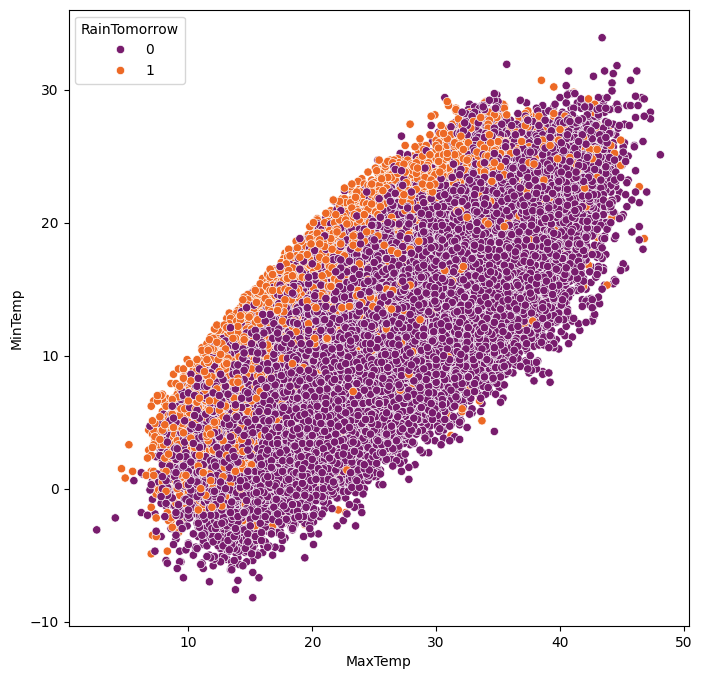

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x='MaxTemp', y='MinTemp', hue='RainTomorrow', palette='inferno', data=train)
plt.show()


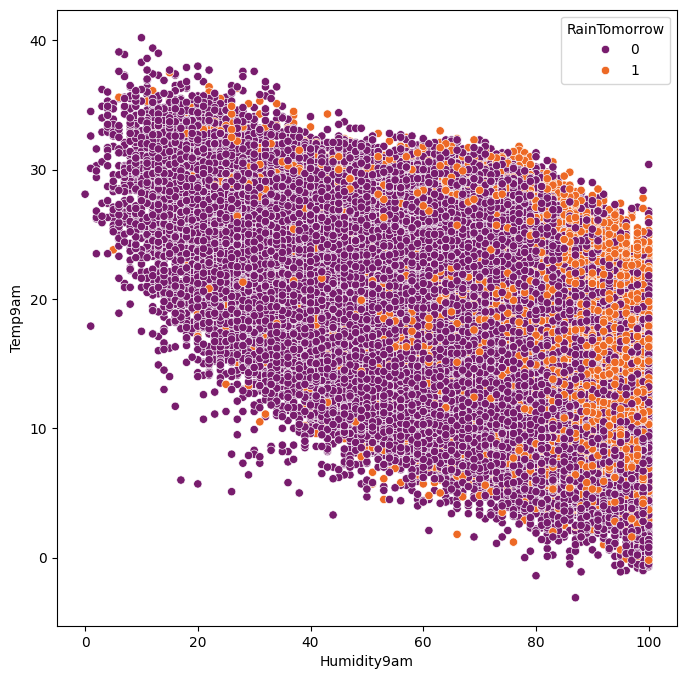

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.scatterplot(x='Humidity9am', y='Temp9am', hue='RainTomorrow', palette='inferno', data=train)
plt.show()


### **LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))
print("\nAccuracy Score:")
print(accuracy_score(y_test, predictions))


Confusion Matrix:
[[16813   851]
 [ 2508  2413]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17664
           1       0.74      0.49      0.59      4921

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585


Accuracy Score:
0.8512729687845916


In [ ]:
import cutecharts.charts as ctc
data=

# New Section

In [ ]:
train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
!pip install roughviz

In [ ]:
import pandas as pd
from roughviz import Bar

# Load the dataset
  # Replace 'your_dataset.csv' with the actual file path

# Extract 'RainTomorrow' column
rain_data = train['RainTomorrow'].value_counts()

# Create data dictionary for the bar plot
data = {
    "labels": rain_data.index.tolist(),
    "values": rain_data.values.tolist()
}

# Create the bar plot
bar = Bar(data=data, title="Rain Tomorrow", title_fontsize=20)
bar.set_xlabel("Rain Tomorrow", fontsize=16)
bar.set_ylabel("Frequency", fontsize=16)

# Show the plot
bar.show()


ModuleNotFoundError: No module named 'roughviz.charts'